In [43]:
# imports

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
# three types of fake data for testing

def signal1(A, t):
    return A * np.sin(30*t) * np.exp(-t) + np.random.randn(t.shape[0])

def signal2(A, t):
    return A * np.sin(30.5*t) * np.exp(-t)+ np.random.randn(t.shape[0])

def signal3(A, t):
    return A * np.sin(31*t) * np.exp(-t) + np.random.randn(t.shape[0])

In [132]:
# tests
A = 2
t = np.linspace(0.0001, 5, 40000)
s1 = signal1(A, t)
s2 = signal2(A, t)
s3 = signal3(A, t)

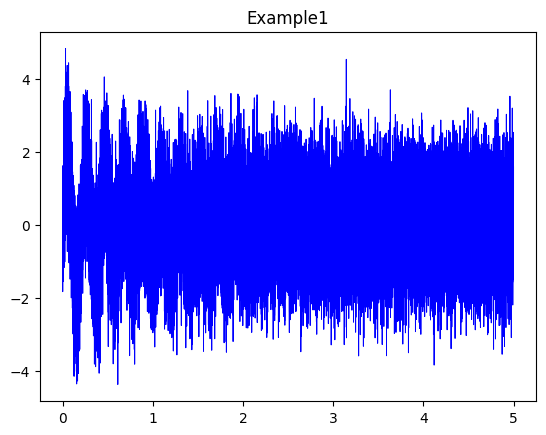

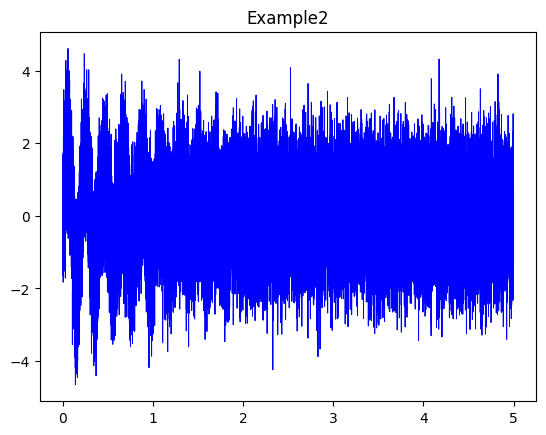

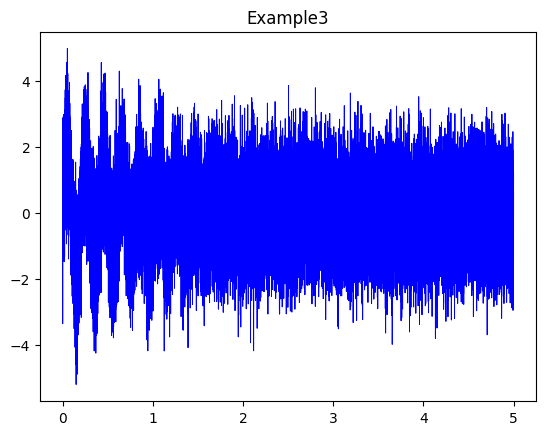

In [133]:
# plot fn for convenience
def plot(x, y, title):
    plt.figure()
    plt.plot(x, y, linewidth=0.7, c='blue')
    plt.title(title)
    plt.savefig(title + '.png')
    plt.show()

plot(t, s1, 'Example1')
plot(t, s2, 'Example2')
plot(t, s3, 'Example3')


In [134]:
# Number of samples and length of each signal
n_samples = 200
signal_length = 40000

# Initialize arrays
X_data = np.zeros((n_samples, signal_length))
y_labels = np.zeros(n_samples)

# time array
t = np.linspace(0, 1, signal_length)

# Generate samples
for i in range(n_samples):
    if i < n_samples // 3:
        X_data[i] = signal1(A, t)
        y_labels[i] = 0
    elif i < 2 * n_samples // 3:
        X_data[i] = signal2(A, t)
        y_labels[i] = 1
    else:
        X_data[i] = signal3(A, t)
        y_labels[i] = 2

# One-hot encode the labels
y_labels_one_hot = to_categorical(y_labels, num_classes=3)

In [135]:
input_shape = (40000,)

# Build the classifier model
def build_classifier(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Dense(256, activation='relu')(inputs)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    
    # Output layer (one hot encoding)
    outputs = layers.Dense(3, activation='softmax')(x)
    
    model = models.Model(inputs, outputs)
    return model

classifier = build_classifier(input_shape)

# Compile the model
classifier.compile(optimizer='adam', 
                   loss='categorical_crossentropy', 
                   metrics=['CategoricalAccuracy'])

# Display model
classifier.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 256)            │    10,240,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,281,603 (39.22 MB)

 Trainable params: 10,281,603 (39.22 MB)

 Non-trainable params: 0 (0.00 B)

In [136]:
# training
classifier.fit(X_data, y_labels_one_hot, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - CategoricalAccuracy: 0.4166 - loss: 9.3746 - val_CategoricalAccuracy: 0.0000e+00 - val_loss: 62.7976
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - CategoricalAccuracy: 0.5618 - loss: 10.2041 - val_CategoricalAccuracy: 0.6750 - val_loss: 0.6425
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - CategoricalAccuracy: 0.6952 - loss: 1.6685 - val_CategoricalAccuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - CategoricalAccuracy: 0.9716 - loss: 0.0921 - val_CategoricalAccuracy: 1.0000 - val_loss: 1.3485e-05
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - CategoricalAccuracy: 0.9812 - loss: 0.0438 - val_CategoricalAccuracy: 0.3000 - val_loss: 1.4833
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - CategoricalAccuracy: 0.9966 - loss: 0.0041 - val_CategoricalAccuracy: 0.2500 - val_loss: 1.5841
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - CategoricalAccuracy: 1.0000 - loss: 1.0457e-06 - val

In [140]:
# test on newly generated data
test = signal3(A, t)
test = np.reshape(test, (1, 40000))

classifier.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0.0000000e+00, 1.0902163e-08, 1.0000000e+00]], dtype=float32)